<font size="6.2">Summary</font>

This notebook demonstrates how to build an **image search system** using **CLIP** (Contrastive Language–Image Pre-training). The workflow involves:

1. **Data Retrieval** – Collecting a set of candidate images.
2. **Model Setup** – Loading a pre-trained CLIP (no fine-tuning required).
3. **Embedding Generation** – Encoding both images and text queries into a shared representation space.
4. **Similarity Search** – Applying cosine similarity to match text queries against image embeddings.
5. **Result Exploration** – Retrieving and visualizing the most relevant images for each query.

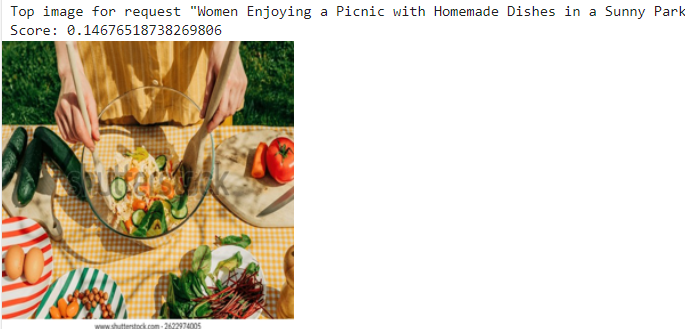

The notebook highlights how cross-modal embeddings enable **text-to-image search** without task-specific training, showcasing the power of modern multimodal models.

Python functions and data files needed to run this notebook are available via this [link](https://github.com/MehdiRezvandehy/visual_search_system.git).

# Scrape [shutterstock](https://www.shutterstock.com/featured-collections/archive?sort=recently-added)


Shutterstock is one of the world’s leading online platforms for stock photography, illustrations, vector art, video footage, and music tracks. Founded in 2003 and headquartered in New York City, the company operates as a global creative marketplace, connecting contributors who upload digital content with customers who license it for personal, commercial, and editorial use.

Key points about Shutterstock:

* **Content Library**: Over **700 million images** and **45 million video clips**, plus music, 3D models, and templates.
* **Contributors**: A worldwide network of photographers, videographers, designers, and musicians who earn royalties when their work is licensed.
* **Customers**: Businesses, media companies, marketers, and individuals who use stock assets for advertising, branding, publishing, web design, and multimedia projects.
* **Technology**: Provides AI-powered tools for content discovery, reverse image search, and generative AI features for creating visuals.
* **Business Model**: Primarily subscription-based or on-demand licenses.
* **Global Reach**: Serves millions of users in more than 150 countries.

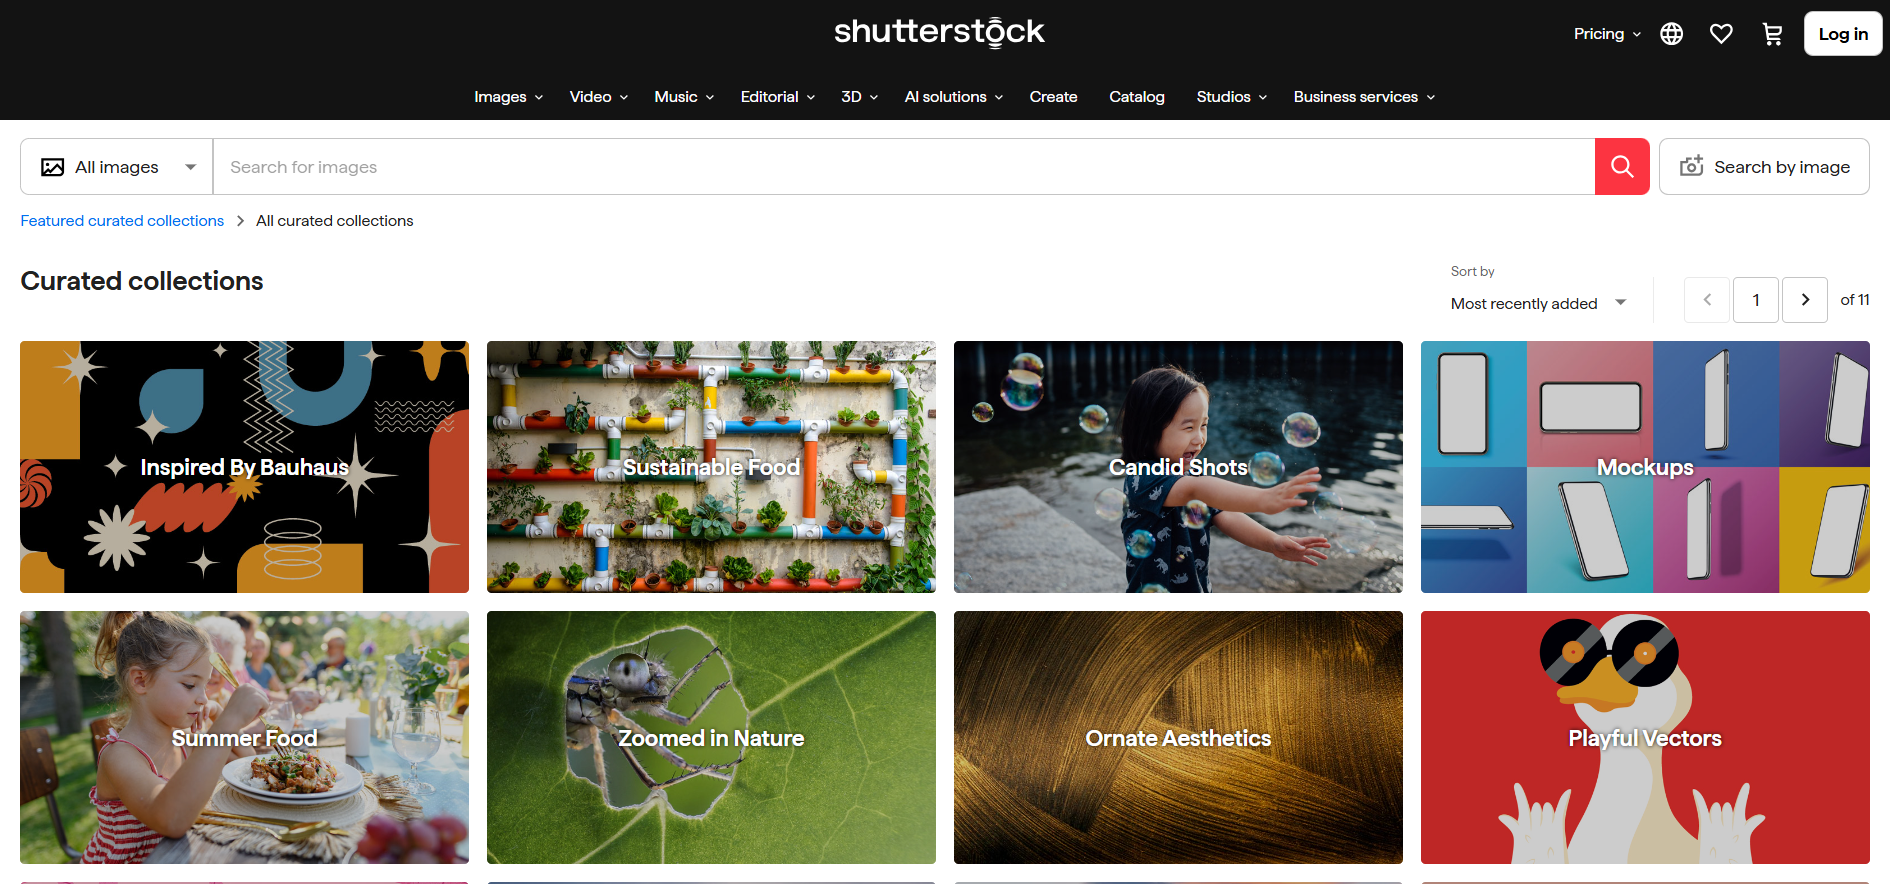

The code below uses **Selenium with a headless Chrome browser** to load a Shutterstock page that requires JavaScript rendering, waits for the content to load, and then parses the page HTML with **BeautifulSoup**. It extracts all links that contain `"/featured-collections/"`, normalizes them into full URLs, removes duplicates, and finally prints the number of unique collection links along with the first 10.


In [1]:
#pip install --quiet transformers
#pip install beautifulsoup4
#pip install selenium
#pip install matplotlib
#pip install Pillow

In [2]:
import warnings
warnings.filterwarnings('ignore')
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time

url = "https://www.shutterstock.com/featured-collections/archive?sort=recently-added"

# Set up headless Chrome
options = Options()
options.headless = True
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36")

driver = webdriver.Chrome(options=options)
driver.get(url)

# Wait for JavaScript to load
time.sleep(5)

# Parse HTML after rendering
soup = BeautifulSoup(driver.page_source, "html.parser")

collection_links = []
for a in soup.find_all("a", href=True):
    href = a["href"]
    if "/featured-collections/" in href:
        if href.startswith("http"):
            collection_links.append(href)
        else:
            collection_links.append("https://www.shutterstock.com" + href)

collection_links = list(set(collection_links))
print(len(collection_links))
print(collection_links[:10])

driver.quit()


37
['https://www.shutterstock.com/featured-collections/dusty-dreams-324305362', 'https://www.shutterstock.com/featured-collections/dark-neon-glow-324702124', "https://www.shutterstock.com/featured-collections/new-year's-resolutions-324944189", 'https://www.shutterstock.com/featured-collections/into-wild-326008269', 'https://www.shutterstock.com/featured-collections/genai-holiday-edition-326669426', 'https://www.shutterstock.com/featured-collections/viva-la-vacay-325994693', 'https://www.shutterstock.com/featured-collections/sustainable-food-326377577', 'https://www.shutterstock.com/featured-collections/3d-illustrations-324701979', 'https://www.shutterstock.com/featured-collections/dreaming-monet-324702169', 'https://www.shutterstock.com/featured-collections/unlimited-image-326090319']


This code loops through a list of **Shutterstock collection pages** (`collection_links`) using a single **headless Chrome Selenium driver**. For each page, it loads the content, waits for JavaScript to render, and then uses a regex to extract all `.jpg` image URLs. It stores unique image links together with their source page, retries up to 3 times if a fetch fails, and finally prints how many unique image links were collected along with a sample of the first 5.


In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import re

options = Options()
options.headless = True  # Use False to debug
options.add_argument("--disable-blink-features=AutomationControlled")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36")

# Start the driver once
driver = webdriver.Chrome(options=options)

links = []
links_seen = set()

for source_url in tqdm(collection_links):
    retries = 3
    while retries > 0:
        try:
            driver.get(source_url)
            time.sleep(3)  # wait for JS to load

            page_source = driver.page_source
            jpg_regex = r'https://[^"]+\.jpg'
            image_links = re.findall(jpg_regex, page_source)

            for image_link in image_links:
                if image_link not in links_seen:
                    links_seen.add(image_link)
                    links.append({"image_link": image_link, "source_link": source_url})

            break  # success, exit retry loop

        except Exception as e:
            print(f"Error fetching {source_url}: {e}")
            retries -= 1
            time.sleep(5)  # wait before retry
            if retries == 0:
                print(f"Failed {source_url} after 3 retries")

driver.quit()
print(f"\n✅ Collected {len(links)} unique image links")
print(links[:5])


100%|██████████████████████████████████████████████████████████████████████████████████| 37/37 [02:51<00:00,  4.63s/it]



✅ Collected 7222 unique image links
[{'image_link': 'https://images.ctfassets.net/hrltx12pl8hq/2Bu8ZEmhePuuSNjL5LWUBw/b79b13ccd0693f8b73bfd42ea0b55cd4/Dust-Dreams.jpg', 'source_link': 'https://www.shutterstock.com/featured-collections/dusty-dreams-324305362'}, {'image_link': 'https://image.shutterstock.com/image-photo/gourmet-lady-vintage-dress-frill-260nw-772290127.jpg', 'source_link': 'https://www.shutterstock.com/featured-collections/dusty-dreams-324305362'}, {'image_link': 'https://image.shutterstock.com/image-photo/valle-de-la-luna-moon-260nw-1803845665.jpg', 'source_link': 'https://www.shutterstock.com/featured-collections/dusty-dreams-324305362'}, {'image_link': 'https://image.shutterstock.com/image-photo/face-elderly-man-feeling-headache-260nw-2488548353.jpg', 'source_link': 'https://www.shutterstock.com/featured-collections/dusty-dreams-324305362'}, {'image_link': 'https://image.shutterstock.com/image-photo/woman-young-green-light-travel-260nw-2336347791.jpg', 'source_link': 

Lets look at the one of the images.

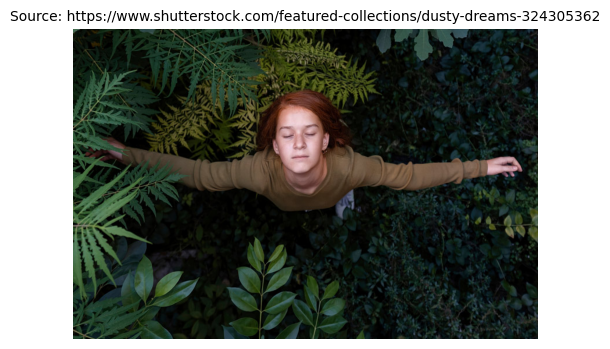

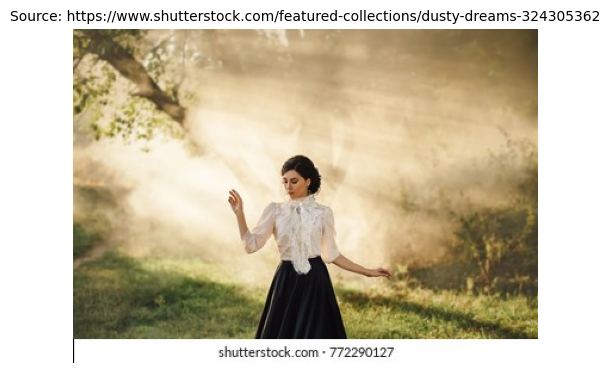

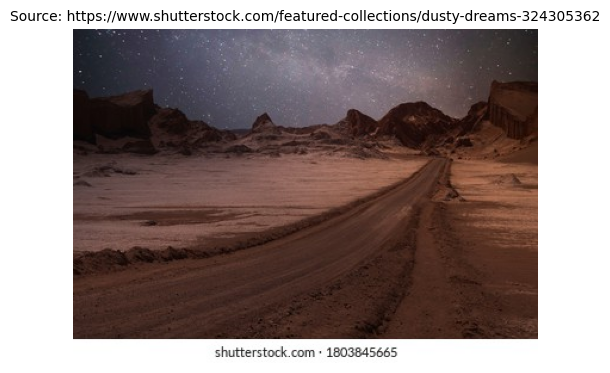

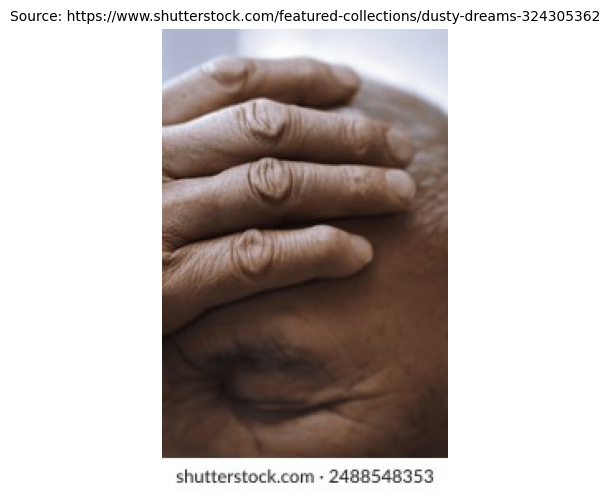

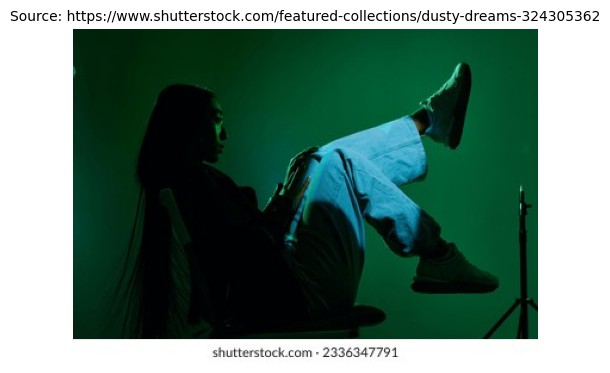

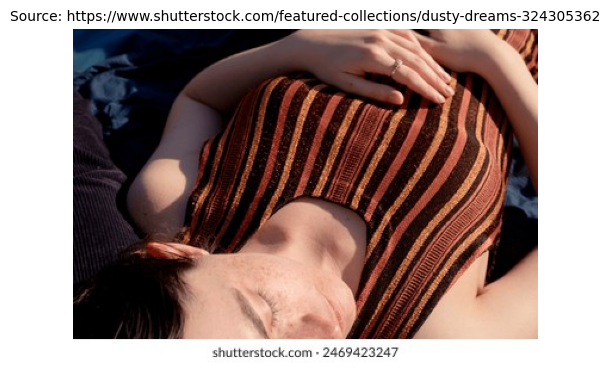

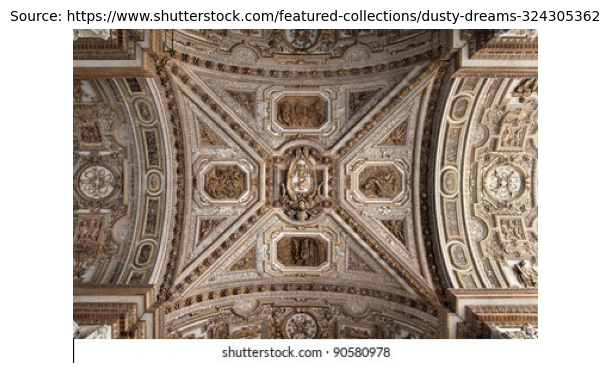

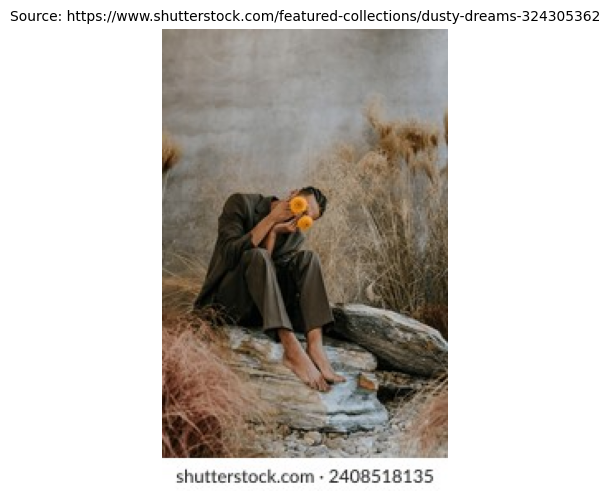

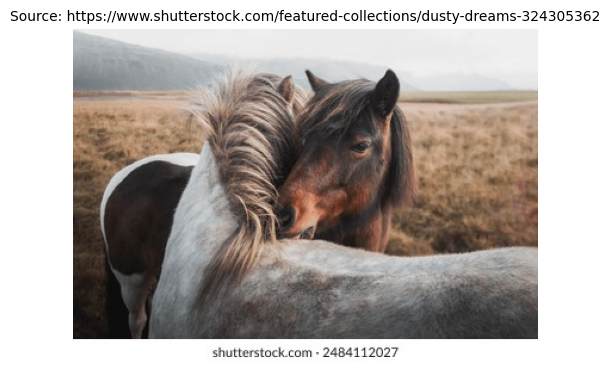

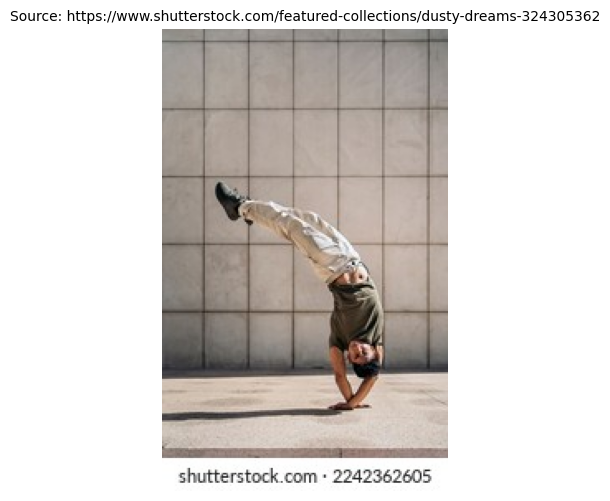

In [4]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

for i in range(10):
    # Fetch the image from URL
    response = requests.get(links[i]['image_link'])
    img = Image.open(BytesIO(response.content))
    
    # Plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Source: {links[i]['source_link']}", fontsize=10)
    plt.show()
    

As can be seen, the images do not have caption.

# Download Siglip (Sigmoid Loss for Language-Image Pretraining)

* Siglip is a **vision-language model** from Google (part of the CLIP family, like OpenAI’s CLIP).
* Instead of using the **softmax contrastive loss** (used in CLIP), SigLIP trains with a **sigmoid-based loss**, which treats image–text pairs as independent binary classification tasks rather than ranking all pairs against each other.
* This makes training more **scalable, stable, and efficient**, especially on **large, noisy datasets**.
* In practice, **SigLIP often outperforms OpenAI’s CLIP** on benchmarks like image–text retrieval and zero-shot classification, while being simpler to implement.

👉 So, **SigLIP is basically a better-trained CLIP** that aligns images and text in a shared embedding space, but with Google’s improved loss function.

In [5]:
#pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
#pip install protobuf
#pip install sentencepiece

The code below loads **Google’s SigLIP model** (the 400M parameter, patch-14, 384-resolution version) from Hugging Face.

* `AutoProcessor.from_pretrained(...)` loads the **preprocessing pipeline** (e.g., tokenization for text and image transforms like resizing/normalization).
* `AutoModel.from_pretrained(...)` loads the actual **SigLIP neural network** (image and text encoders).
* `.eval()` puts the model into **inference mode** (disables dropout, etc.).
* The comment `# CPU by default   .to('cuda')` means it runs on CPU unless you explicitly move it to GPU for faster inference.

In [6]:
# Load model directly
from transformers import AutoProcessor, AutoModel

processor = AutoProcessor.from_pretrained("google/siglip-so400m-patch14-384")
model = AutoModel.from_pretrained("google/siglip-so400m-patch14-384").eval()  # CPU by default   .to('cuda')

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


# Batch Processing Scraped Images into SigLIP Embeddings

This code takes the list of image URLs we scraped earlier (links), downloads the images in batches, and encodes them into SigLIP image embeddings. I am only looking at 5000 URLs as it is very expensive on CPU.

In [7]:
nsample = 2000

In [8]:
import torch
from tqdm import tqdm
from PIL import Image
from torch.utils.data import DataLoader
import requests

# Initializes a big tensor torch_image_embeddings on CPU to hold all image embeddings 
# (dimension 1152, which is SigLIP’s embedding size).
# Define batch size and initialize tensor for embeddings
batch_size = 32  # Start with 32, adjust if needed
torch_image_embeddings = torch.zeros((len(links[:nsample]), 1152)).to('cpu')
used_links = []

# Defines a process_batch function that downloads images from their URLs, 
# preprocesses them with the SigLIP processor, runs them through the model 
# on GPU, and moves the resulting embeddings back to CPU.
def process_batch(batch_links):
    images = []
    _used_links = []
    for l in batch_links['image_link']:
        if l in used_links:
            continue
        try:
            images.append(Image.open(requests.get(l, stream=True).raw))
            _used_links.append(l)
        except:
            print(f'error. Skipping {l}')

    with torch.no_grad():
        # Move only the input to the GPU
        #image_inputs = processor(images=images, return_tensors="pt").to("cuda")
        image_inputs = processor(images=images, return_tensors="pt")
        batch_embeddings = model.get_image_features(**image_inputs)
        batch_embeddings = batch_embeddings.cpu()  # Move back to CPU after processing

    return _used_links, batch_embeddings

# Uses a PyTorch DataLoader to split links into batches of 32.
data_loader = DataLoader(links[:nsample], batch_size=batch_size, shuffle=False)

# Iterates through the batches, computes embeddings, and fills them 
# into the pre-allocated tensor in order.
start_idx = 0
for batch_links in tqdm(data_loader, total=len(data_loader)):
    try:
        __used_links, batch_embeddings = process_batch(batch_links)
        end_idx = start_idx + batch_embeddings.shape[0]
        torch_image_embeddings[start_idx:end_idx] = batch_embeddings
        start_idx = end_idx
        
        # Keeps track of used_links to avoid duplicates,
        used_links += __used_links

        ## Free up GPU memory after each batch
        #del batch_embeddings
        #torch.cuda.empty_cache()

    except Exception as e:
        print(e)
        print(f'error. Skipping batch')

  3%|██▌                                                                             | 2/63 [07:03<3:35:23, 211.87s/it]

error. Skipping https://image.shutterstock.com/image-photo/floral-sunlight-shadows-on-neutral-260nw-2498094767.jpg
error. Skipping https://image.shutterstock.com/image-photo/floral-sunlight-shadows-on-neutral-600w-2498094767.jpg


  8%|██████▎                                                                         | 5/63 [17:57<3:32:23, 219.71s/it]

error. Skipping https://image.shutterstock.com/image-photo/golden-eagle-aquila-chrysaetos-one-260nw-2498069731.jpg
error. Skipping https://image.shutterstock.com/image-photo/golden-eagle-aquila-chrysaetos-one-600w-2498069731.jpg


 10%|███████▌                                                                        | 6/63 [21:14<3:21:25, 212.02s/it]

error. Skipping https://image.shutterstock.com/image-photo/horizontal-medium-closeup-portrait-african-260nw-1977500189.jpg
error. Skipping https://image.shutterstock.com/image-photo/horizontal-medium-closeup-portrait-african-600w-1977500189.jpg


 37%|████████████████████████████                                                 | 23/63 [1:22:49<2:21:59, 212.99s/it]

error. Skipping https://image.shutterstock.com/image-photo/group-emperor-penguins-stands-together-260nw-2561901117.jpg


 38%|█████████████████████████████▎                                               | 24/63 [1:26:14<2:16:55, 210.65s/it]

error. Skipping https://image.shutterstock.com/image-photo/group-emperor-penguins-stands-together-600w-2561901117.jpg


 75%|██████████████████████████████████████████████████████████▉                    | 47/63 [2:48:22<58:20, 218.80s/it]

error. Skipping https://image.shutterstock.com/image-vector/3d-high-five-hands-confetti-260nw-2433939967.jpg


 78%|█████████████████████████████████████████████████████████████▍                 | 49/63 [2:55:18<49:47, 213.38s/it]

error. Skipping https://image.shutterstock.com/image-vector/3d-high-five-hands-confetti-600w-2433939967.jpg


 79%|██████████████████████████████████████████████████████████████▋                | 50/63 [2:58:39<45:24, 209.59s/it]

error. Skipping https://image.shutterstock.com/image-vector/3d-classic-red-umbrella-rain-260nw-2431622155.jpg
error. Skipping https://image.shutterstock.com/image-vector/3d-classic-red-umbrella-rain-600w-2431622155.jpg
error. Skipping https://image.shutterstock.com/image-vector/3d-online-shopping-ecommerce-concept-260nw-2426145613.jpg
error. Skipping https://image.shutterstock.com/image-vector/3d-online-shopping-ecommerce-concept-600w-2426145613.jpg


 83%|█████████████████████████████████████████████████████████████████▏             | 52/63 [3:05:10<37:19, 203.61s/it]

error. Skipping https://image.shutterstock.com/image-photo/playful-fashion-portrait-stylish-woman-260nw-2562516279.jpg


 84%|██████████████████████████████████████████████████████████████████▍            | 53/63 [3:08:37<34:05, 204.58s/it]

error. Skipping https://image.shutterstock.com/image-photo/playful-fashion-portrait-stylish-woman-600w-2562516279.jpg


100%|███████████████████████████████████████████████████████████████████████████████| 63/63 [3:43:19<00:00, 212.69s/it]


👉 End result of the code: `torch_image_embeddings` contains embeddings for all successfully processed images, stored efficiently on CPU and ready for downstream tasks (like similarity search or clustering).

In [9]:
torch_image_embeddings = torch_image_embeddings[:len(used_links)]
torch_image_embeddings.shape

torch.Size([1984, 1152])

In [10]:
model.get_image_features(**processor(images=Image.open(requests.get(used_links[0], stream=True).raw), 
                                     return_tensors="pt"))[0][:5]

tensor([0.1646, 0.3025, 0.0543, 0.3380, 0.1341], grad_fn=<SliceBackward0>)

In [11]:
torch_image_embeddings.shape

torch.Size([1984, 1152])

In [12]:
torch_image_embeddings[0][:5]

tensor([0.1646, 0.3025, 0.0543, 0.3380, 0.1341])

The code below shows image search, it takes a list of basic queries

In [13]:
import torch.nn.functional as F
from IPython.display import Image, display
# Define candidate labels

def generate_stock_photo_recs(stock_photo_requests, k = 5):
    """
    This code applies RAG for images
    stock_photo_requests: list of basic queries
    k: number of images to return
    """

    # Preprocess inputs
    #text_inputs = processor(text=stock_photo_requests, return_tensors="pt", padding=True).to('cuda')
    # pass the stock_photo_requests to processor which has a tokenizer, processor tokenize all of the queries
    text_inputs = processor(text=stock_photo_requests, return_tensors="pt", padding=True)
    
    # get text embedding from the processor ouyput text_inputs,
    torch_text_embeddings = model.get_text_features(text_inputs.input_ids).cpu()

    # Compute cosine similarity scores using torch.cosine
    cosine_scores = torch.cosine_similarity(torch_text_embeddings, torch_image_embeddings.unsqueeze(1), dim=-1)

    image_indices = cosine_scores.argsort(dim=0, descending=True).T.tolist()
    image_scores = cosine_scores.sort(dim=0, descending=True).values.T.tolist()
    probs = torch.sigmoid(torch.as_tensor(image_scores)).tolist()

    results = []
    for i, (image_index, image_score) in enumerate(zip(image_indices, image_scores)):
        top_k_images = image_index[:k]
        top_k_scores = image_score[:k]
        results.append({
            "request": stock_photo_requests[i],
            "top_k_images": [used_links[t] for t in top_k_images],
            "top_k_scores": top_k_scores
        })

    return results

In [14]:
import torch
import torch.nn.functional as F
from IPython.display import Image, display

def generate_stock_photo_recs(stock_photo_requests, k=5):
    """
    Retrieve relevant stock photo recommendations using text-to-image retrieval.

    Args:
        stock_photo_requests (list[str]): List of textual queries describing the desired stock photos.
        k (int, optional): Number of top images to return for each query. Default is 5.

    Returns:
        list[dict]: A list of results, where each item contains:
            - "request": The original query string.
            - "top_k_images": List of top-k image URLs or paths.
            - "top_k_scores": List of similarity scores for the top-k images.
    """

    # Tokenize text queries using the processor
    text_inputs = processor(
        text=stock_photo_requests,
        return_tensors="pt",
        padding=True
    )
    
    # Extract text embeddings from the model
    text_embeddings = model.get_text_features(
        text_inputs.input_ids
    ).cpu()

    # Compute cosine similarity between text and all image embeddings
    cosine_scores = torch.cosine_similarity(
        text_embeddings, 
        torch_image_embeddings.unsqueeze(1), 
        dim=-1
    )

    # Sort indices and scores in descending order
    sorted_indices = cosine_scores.argsort(dim=0, descending=True).T.tolist()
    sorted_scores = cosine_scores.sort(dim=0, descending=True).values.T.tolist()

    # Apply sigmoid normalization to scores
    normalized_scores = torch.sigmoid(torch.tensor(sorted_scores)).tolist()

    results = []
    for i, (indices, scores) in enumerate(zip(sorted_indices, sorted_scores)):
        top_k_indices = indices[:k]
        top_k_scores = scores[:k]
        results.append({
            "request": stock_photo_requests[i],
            "top_k_images": [used_links[idx] for idx in top_k_indices],
            "top_k_scores": top_k_scores
        })

    return results

In [25]:
stock_photo_requests = ["Beautiful scenary from airplane window at evening", "A person eating watermelon",]
results = generate_stock_photo_recs(stock_photo_requests, k=1)
results

[{'request': 'Beautiful scenary from airplane window at evening',
  'top_k_images': ['https://image.shutterstock.com/z/stock-photo-a-passanger-looking-out-the-airplane-window-during-sunset-2447397523.jpg'],
  'top_k_scores': [0.13592387735843658]},
 {'request': 'A person eating watermelon',
  'top_k_images': ['https://image.shutterstock.com/z/stock-photo-cute-little-girl-eating-watermelon-on-the-grass-in-summertime-54065323.jpg'],
  'top_k_scores': [0.12953577935695648]}]

Top image for request "Beautiful scenary from airplane window at evening":
Score: 0.13592387735843658


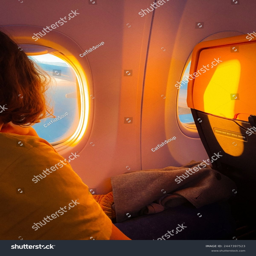

Top image for request "A person eating watermelon":
Score: 0.12953577935695648


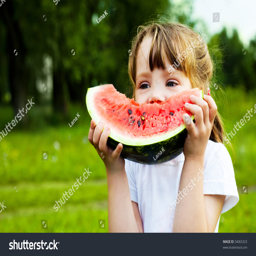

In [26]:
from PIL import Image

for result in results:
    print(f'Top image for request "{result["request"]}":')
    for image_link in result['top_k_images']:
        # shrink to fit
        print(f'Score: {result["top_k_scores"][result["top_k_images"].index(image_link)]}')
        display(Image.open(requests.get(image_link, stream=True).raw).resize((256, 256)))

# Prompt-Driven Stock Image Title Generation

A creative workflow involves using GenAI (such as OpenAI) to generate potential titles along with brief descriptions. These AI-generated titles can then serve as search queries for exploring the stock image database.

In [17]:
#pip install python-dotenv

In [18]:
import os
from dotenv import load_dotenv

load_dotenv(dotenv_path='.env', override=True)  # reads .env file
api_key = os.getenv("OPENAI_API_KEY")

print(api_key[:8])  # just to check it's loaded


sk-proj-


In [19]:
from openai import OpenAI
#from google.colab import userdata
from langchain_openai import ChatOpenAI


openai_client = OpenAI(
    api_key=api_key
)

# Initialize LLM
llm = ChatOpenAI(
    model="gpt-4o-mini",   # or "gpt-4o", "gpt-3.5-turbo", etc.
    temperature=0          # 0 = deterministic, higher = more creative
)

In [20]:
#pip install langchain_openai
#pip install langchain langchain-community -q

In [21]:
scene_description = 'women or children eating or preparing food'

from langchain.output_parsers import CommaSeparatedListOutputParser
from langchain.prompts import PromptTemplate

# Define parser
parser = CommaSeparatedListOutputParser()

# Build prompt
prompt = PromptTemplate(
    template="think through and write 5 example stock photo titles for a scene : {scene_description}. I need the examples as a list of strings. Only list, not extra information without numbering",
    input_variables=["k"],
    partial_variables={"format_instructions": parser.get_format_instructions()}
)

# Call the model
chain = prompt | llm | parser
stock_photo_requests = chain.invoke({"scene_description": scene_description})

print(stock_photo_requests)

['Joyful Children Baking Cookies Together in a Bright Kitchen  ', 'Mother and Daughter Preparing a Colorful Salad in the Garden  ', 'Smiling Friends Cooking Pasta and Sharing Laughter in the Kitchen  ', 'Little Chefs Decorating Cupcakes with Colorful Frosting  ', 'Women Enjoying a Picnic with Homemade Dishes in a Sunny Park  ']


In [22]:
results = generate_stock_photo_recs(stock_photo_requests, k=1)
results

[{'request': 'Joyful Children Baking Cookies Together in a Bright Kitchen  ',
  'top_k_images': ['https://image.shutterstock.com/z/stock-photo-three-generation-males-decorating-gingerbread-house-at-christmas-2221897031.jpg'],
  'top_k_scores': [0.10619477927684784]},
 {'request': 'Mother and Daughter Preparing a Colorful Salad in the Garden  ',
  'top_k_images': ['https://image.shutterstock.com/z/stock-photo-a-woman-joyfully-examines-green-tomatoes-in-her-garden-the-lush-plants-and-modern-cabin-backdrop-2503619849.jpg'],
  'top_k_scores': [0.14137211441993713]},
 {'request': 'Smiling Friends Cooking Pasta and Sharing Laughter in the Kitchen  ',
  'top_k_images': ['https://image.shutterstock.com/z/stock-photo-happy-multigenerational-people-having-fun-doing-barbecue-grill-at-house-rooftop-summer-gatherings-2298094479.jpg'],
  'top_k_scores': [0.10109487175941467]},
 {'request': 'Little Chefs Decorating Cupcakes with Colorful Frosting  ',
  'top_k_images': ['https://image.shutterstock.com

Top image for request "Joyful Children Baking Cookies Together in a Bright Kitchen  ":
Score: 0.10619477927684784


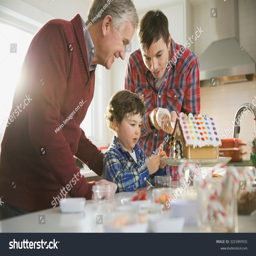

Top image for request "Mother and Daughter Preparing a Colorful Salad in the Garden  ":
Score: 0.14137211441993713


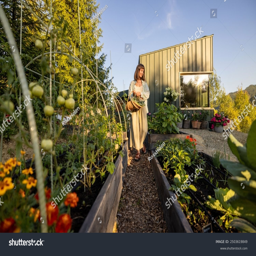

Top image for request "Smiling Friends Cooking Pasta and Sharing Laughter in the Kitchen  ":
Score: 0.10109487175941467


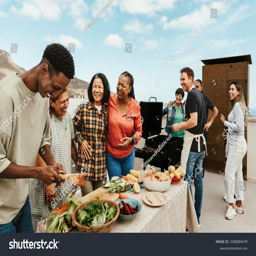

Top image for request "Little Chefs Decorating Cupcakes with Colorful Frosting  ":
Score: 0.0807461068034172


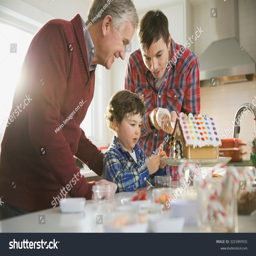

Top image for request "Women Enjoying a Picnic with Homemade Dishes in a Sunny Park  ":
Score: 0.14676518738269806


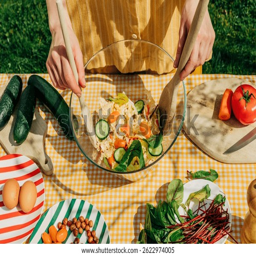

In [23]:
from PIL import Image

for result in results:
    print(f'Top image for request "{result["request"]}":')
    for image_link in result['top_k_images']:
        # shrink to fit
        print(f'Score: {result["top_k_scores"][result["top_k_images"].index(image_link)]}')
        display(Image.open(requests.get(image_link, stream=True).raw).resize((256, 256)))

# Limitations of CLIP


**CLIP’s Training Setup**

* CLIP was trained on **image–caption pairs**, where the caption is assumed to describe the same thing as the image.
* In reality, a caption usually doesn’t capture *everything* in an image, but it should capture part of its meaning.
* So, CLIP learns to make the **image embedding** and the **caption embedding** land close together in a shared semantic space.
* Like other embedding systems, the comparison is about **semantic similarity**, not pixel similarity.

---

**Why This Matters**

* For tasks like **image retrieval or caption matching**, this works great:

  * “A dog playing in the snow” ↔️ 
   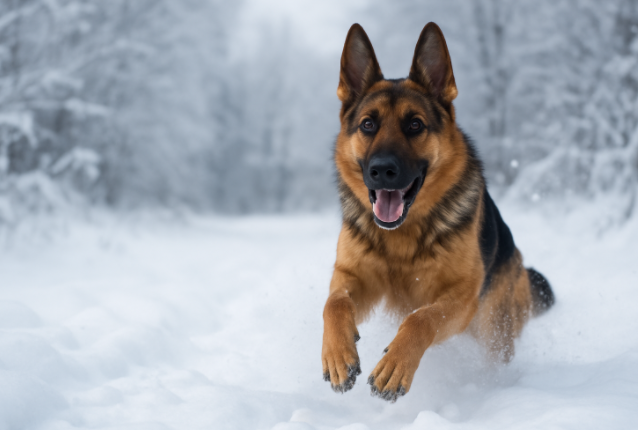
   
* But in a **Visual Question Answering (VQA)** setup, the situation is different:

  * The *question* (“What color is the car?”) and the *image* (a photo with a red car) are **not semantically equivalent**.
  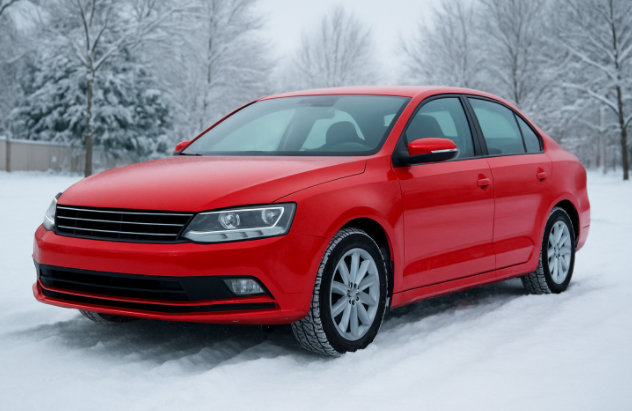
  
  * The question is not describing the image — it’s asking about part of it.
* Since CLIP only checks whether two inputs have *similar overall meaning*, it can’t directly handle VQA, because VQA requires reasoning over **relationships and details**, not just overall similarity.

---

👉 In short:

* **CLIP = semantic similarity between image & caption**.
* **VQA = reasoning about image details given a question**.
* That’s why CLIP embeddings alone are not enough for VQA.
